In [1]:
import os
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import gensim
from gensim.models import word2vec
import string
import re
random.seed(1)
np.random.seed(1)

In [4]:
os.chdir('C:/Users/torna/Documents/StatApp/StatApp')
#os.chdir('C:/Users/Kim Antunez/Documents/Projets_autres')
#os.chdir('/Users/alainquartierlatente/Desktop/Ensae/StatApp')
#os.chdir('/home/aqlt/Documents/Ensae/StatApp')

In [5]:
with open("data/sentimental_analysis/reg_log_git.file", "rb") as f:
    reg_log_git = pickle.load(f)

In [33]:
# On traite la mise en forme comme dans notre corpus
def mise_en_forme_phrase (phrase):
    phrase = phrase.lower()
    # On enlève la ponctuation + certaines apostrophes
    phrase = phrase.translate(str.maketrans('', '', string.punctuation + "'’«»—"))
    # On enlève les passages à la ligne
    phrase = re.sub('\\n', ' ', phrase)
    # On enlève les tabulations
    phrase = re.sub('\\t', ' ', phrase)
    # On enlève les espaces multiples et les espaces à la fin des phrases
    phrase = re.sub(' +', ' ', phrase)
    phrase = re.sub(' +$', '', phrase)
    phrase = re.sub('^ +', '', phrase)
    # phrase.isalpha() # inutile
    return(phrase)

In [39]:
def calcul_sentence_embedding(phrase):
    if len(phrase)>0:
        sum1 = sum(matrice[mot] for mot in phrase if mot in model1.wv.index2word)
        #sum1 = sum(matrice_norm[mot] for mot in phrase if mot in model1.wv.index2word)
        sum2 = sum(matrice["lowfrequencyword"] for mot in phrase if mot not in model1.wv.index2word)
        #sum2 = sum(matrice_norm["lowfrequencyword"] for mot in phrase if mot not in model1.wv.index2word)
        return (sum1+sum2)/len(phrase)
    else:
        return matrice["lowfrequencyword"]

In [40]:
nom_dossier = 'ens'
# dim = 50
dim = 100
# dim = 300
epoch = 100
window = 4
learning_rate = 0.02
    
chemin1 = "data/{}/gensim/dim{}_ep{}_w{}_lr{}_seed1".format(nom_dossier, dim, epoch, window, str(learning_rate)[2:]) 
model1 = gensim.models.keyedvectors.KeyedVectors.load(chemin1 + "/word2vec.model")
chemin2 = "data/{}/gensim/dim{}_ep{}_w{}_lr{}_seed5".format(nom_dossier, dim, epoch, window, str(learning_rate)[2:])  
model2 = gensim.models.keyedvectors.KeyedVectors.load(chemin2 + "/word2vec.model")
chemin3 = "data/{}/gensim/dim{}_ep{}_w{}_lr{}_seed10".format(nom_dossier, dim, epoch, window, str(learning_rate)[2:])  
model3 = gensim.models.keyedvectors.KeyedVectors.load(chemin3 + "/word2vec.model")
chemin4 = "data/{}/gensim/dim{}_ep{}_w{}_lr{}_seed15".format(nom_dossier, dim, epoch, window, str(learning_rate)[2:])  
model4 = gensim.models.keyedvectors.KeyedVectors.load(chemin4 + "/word2vec.model")
chemin5 = "data/{}/gensim/dim{}_ep{}_w{}_lr{}_seed20".format(nom_dossier, dim, epoch, window, str(learning_rate)[2:])  
model5 = gensim.models.keyedvectors.KeyedVectors.load(chemin5 + "/word2vec.model")
chemin6 = "data/{}/gensim/dim{}_ep{}_w{}_lr{}_seed25".format(nom_dossier, dim, epoch, window, str(learning_rate)[2:]) 
model6 = gensim.models.keyedvectors.KeyedVectors.load(chemin6 + "/word2vec.model")

matrice = {word : (model1.wv[word]+model2.wv[word]+model3.wv[word]+model4.wv[word]+model5.wv[word]+model6.wv[word])/6
           for word in model1.wv.index2word}

def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
        return v
    return v / norm

matrice_norm = {word : normalize(matrice[word]) for word in matrice.keys()}

In [83]:
resultat = pd.DataFrame(columns=['Moyenne','Moyenne_bis'])

In [78]:
def creer_indice(noms):
    for nom in noms:
        print(nom)
        df = pd.read_csv("data/sentimental_analysis/tweet_filtered_trim/" + nom +"-trim-agg.txt",sep="######",header=None,engine='python',encoding='UTF-8')
        df.columns = ['tweet']
        phrases = [mise_en_forme_phrase(ligne.tweet).split() for ligne in df.itertuples()]
        phrases_emb = [calcul_sentence_embedding(phrase) for phrase in phrases]
        Y = reg_log_git.predict(phrases_emb)
        Y_bis = [max(val,0) for val in Y]
        resultat.loc[nom[0:7]] = [Y.mean(),np.mean(Y_bis)]

In [81]:
noms = []
for i in range(2011,2019):
    for j in range(1,13):
        if j!=8:
            if j < 10:
                mot = "0"+str(j)
            else:
                mot = str(j)
            noms.append(str(str(i)+"-"+mot+"-"+mot))

In [84]:
creer_indice(noms)

2011-01-01
2011-02-02
2011-03-03
2011-04-04
2011-05-05
2011-06-06
2011-07-07
2011-09-09
2011-10-10
2011-11-11
2011-12-12
2012-01-01
2012-02-02
2012-03-03
2012-04-04
2012-05-05
2012-06-06
2012-07-07
2012-09-09
2012-10-10
2012-11-11
2012-12-12
2013-01-01
2013-02-02
2013-03-03
2013-04-04
2013-05-05
2013-06-06
2013-07-07
2013-09-09
2013-10-10
2013-11-11
2013-12-12
2014-01-01
2014-02-02
2014-03-03
2014-04-04
2014-05-05
2014-06-06
2014-07-07
2014-09-09
2014-10-10
2014-11-11
2014-12-12
2015-01-01
2015-02-02
2015-03-03
2015-04-04
2015-05-05
2015-06-06
2015-07-07
2015-09-09
2015-10-10
2015-11-11
2015-12-12
2016-01-01
2016-02-02
2016-03-03
2016-04-04
2016-05-05
2016-06-06
2016-07-07
2016-09-09
2016-10-10
2016-11-11
2016-12-12
2017-01-01
2017-02-02
2017-03-03
2017-04-04
2017-05-05
2017-06-06
2017-07-07
2017-09-09
2017-10-10
2017-11-11
2017-12-12
2018-01-01
2018-02-02
2018-03-03
2018-04-04
2018-05-05
2018-06-06
2018-07-07
2018-09-09
2018-10-10
2018-11-11
2018-12-12


In [86]:
with open("data/sentimental_analysis/index.file", "wb") as f:
    pickle.dump(resultat, f, pickle.HIGHEST_PROTOCOL)

In [115]:
with open("data/sentimental_analysis/index.file", "rb") as f:
    resultat = pickle.load(f)
resultat

,Moyenne,Moyenne_bis
2011-01,0.350554,0.675277
2011-02,0.370097,0.685048
2011-03,0.350096,0.675048
2011-04,0.379048,0.689524
2011-05,0.327619,0.663810
...,...,...
2018-07,0.148571,0.574286
2018-09,0.138571,0.569286
2018-10,0.179524,0.589762
2018-11,0.168095,0.584048


In [123]:
resultat_norm = pd.DataFrame(columns=['Moyenne','Moyenne_bis'])
for index, row in resultat.iterrows():
    resultat_norm.loc[index,'Moyenne'] = round(100*resultat.loc[index,'Moyenne'] / resultat.loc['2011-01','Moyenne'])
    resultat_norm.loc[index,'Moyenne_bis'] = round(100*resultat.loc[index,'Moyenne_bis'] / resultat.loc['2011-01','Moyenne_bis'])

In [124]:
resultat_norm

,Moyenne,Moyenne_bis
2011-01,100,100
2011-02,106,101
2011-03,100,100
2011-04,108,102
2011-05,93,98
...,...,...
2018-07,42,85
2018-09,40,84
2018-10,51,87
2018-11,48,86


In [131]:
index = pd.read_csv("data/sentimental_analysis/camme.csv",sep=';',header=0,engine='python',encoding='UTF-8')
index

,Date,Indice
0,2011-01,89
1,2011-02,89
2,2011-03,87
3,2011-04,86
4,2011-05,87
...,...,...
91,2018-08,96
92,2018-09,94
93,2018-10,94
94,2018-11,91


In [137]:
index['Indice']

0     89
1     89
2     87
3     86
4     87
      ..
91    96
92    94
93    94
94    91
95    88
Name: Indice, Length: 96, dtype: int64

In [132]:
camme = pd.DataFrame(columns=['Indice'])

In [141]:
for i, row in index.iterrows():
    ind = index.loc[i,'Date']
    camme.loc[ind,'Indice'] = round(100*index.loc[i,'Indice'] / index.loc[0,'Indice'])

In [157]:
camme_aout = pd.DataFrame(columns=['Indice'])
for i, row in camme.iterrows():
    if i not in ['2011-08','2012-08','2013-08','2014-08','2015-08','2016-08','2017-08','2018-08']:
        camme_aout.loc[i,'Indice'] = camme.loc[i,'Indice']

In [159]:
x = resultat_norm['Moyenne']
y = resultat_norm['Moyenne_bis']
z = camme_aout['Indice']

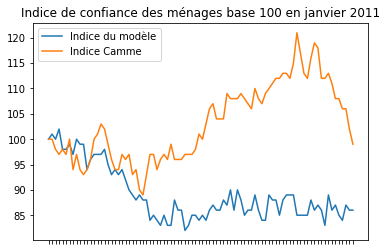

In [205]:
import matplotlib.pyplot as plt
#plt.plot(x)
fig, ax = plt.subplots()
ax.set_xticklabels([])  
#plt.plot(x)
plt.plot(y)
plt.plot(z)
#plt.legend(["Indice du modèle (-1/1)","Indice du modèle (0/1)","Indice Camme"])
plt.legend(["Indice du modèle","Indice Camme"])
plt.title("Indice de confiance des ménages base 100 en janvier 2011")
plt.show()

In [250]:
df_y = pd.DataFrame(y)
df_z = pd.DataFrame(z)
df_res = pd.concat([df_y,df_z])
df_res.iplot(y=['Moyenne_bis','Indice'], mode='lines+markers',asFigure=True)

In [207]:
#res = pd.DataFrame(columns=['Modèle','Modèle_bis','Réalité'])
#res['Modèle'] = y
#res['Modèle_bis'] = y
res = pd.DataFrame(columns=['Modèle','Réalité'])
res['Modèle'] = y                  
res['Réalité'] = z

In [208]:
s2 = res.astype('int64', copy=False)

In [209]:
s2.corr()

,Modèle,Réalité
Modèle,1.000000,-0.340756
Réalité,-0.340756,1.000000
